C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes = [pd.read_csv(file, delim_whitespace=True, header=None, names=columns) for file in file_paths]
C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes = [pd.read_csv(file, delim_whitespace=True, header=None, names=columns) for file in file_paths]
C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes = [pd.read_csv(file, delim_whitespace=True, header=None, names=columns) for file in file_paths]


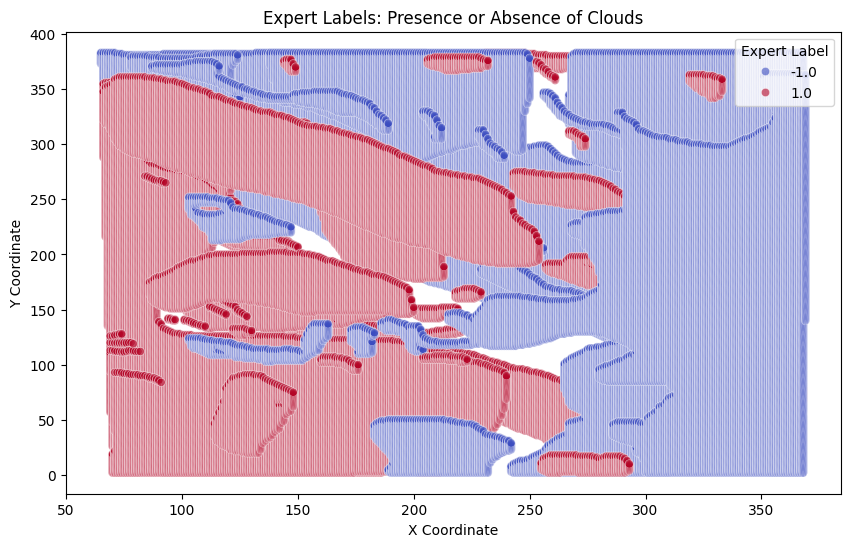

C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='expert_label', y=col, data=data, palette='coolwarm')
C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='expert_label', y=col, data=data, palette='coolwarm')
C:\Users\f3met\AppData\Local\Temp\ipykernel_24800\3124675189.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='expert_label', y=col, data=data, palette='coolwarm')
C:\Users\f3met\AppData\Local\Temp\ipy

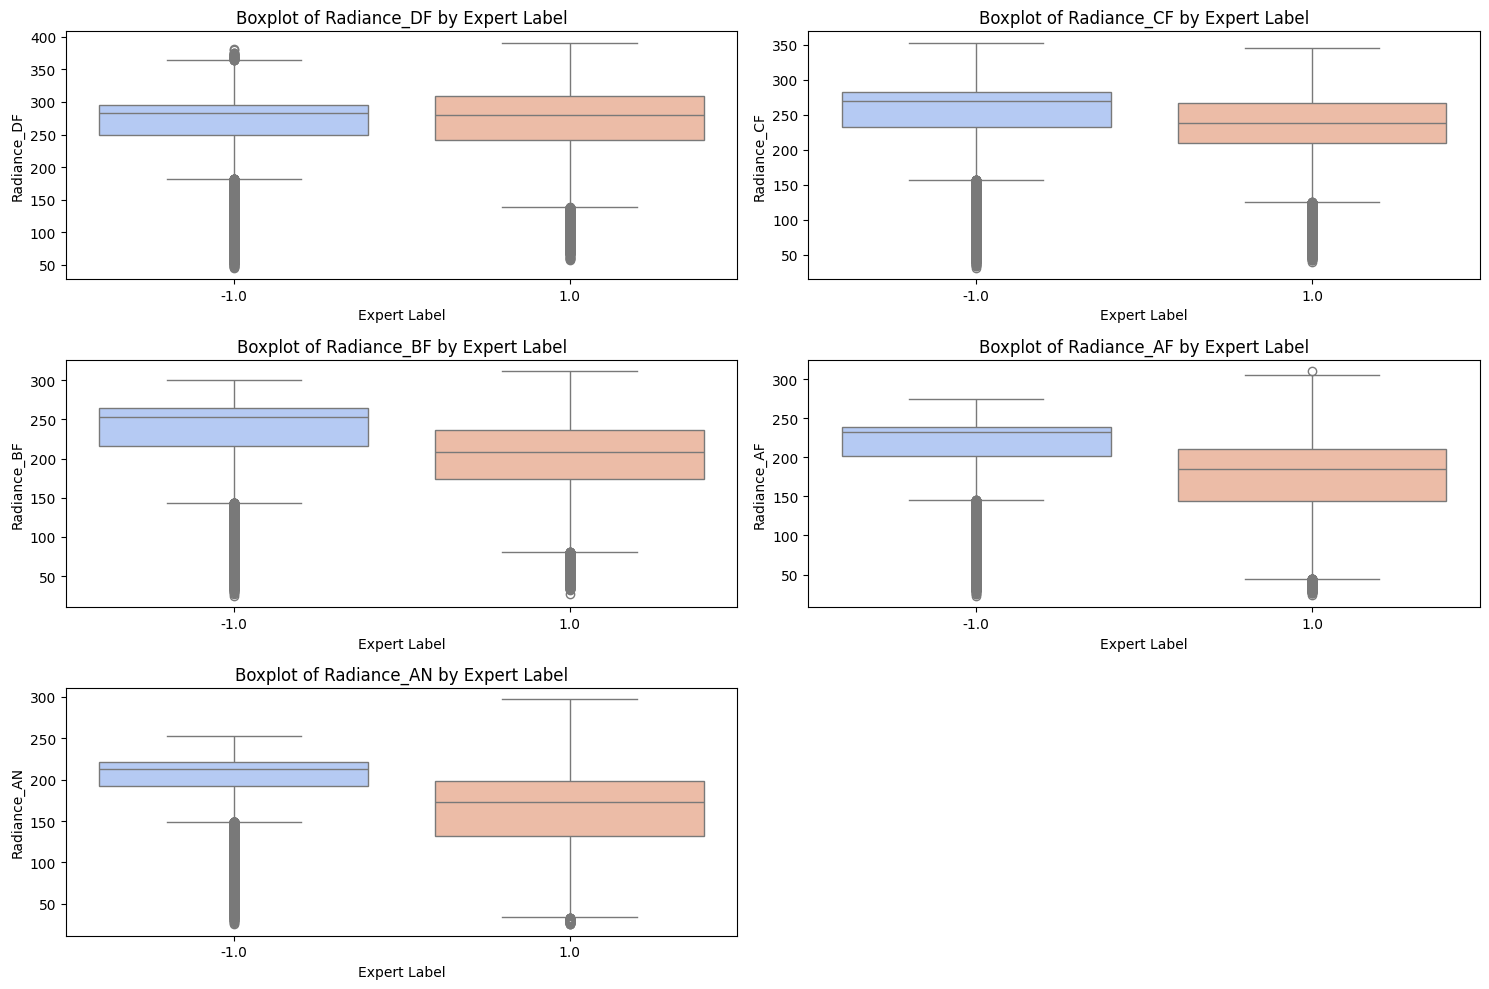

In [4]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the uploaded zip file
zip_path = '../data/image_data.zip'
extracted_folder = './data/image_data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List extracted files
extracted_files = os.listdir(extracted_folder)

# Load the extracted text files into dataframes
file_paths = [os.path.join(extracted_folder, file) for file in extracted_files]
columns = ['y', 'x', 'expert_label', 'NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Read each text file into a dataframe
dataframes = [pd.read_csv(file, delim_whitespace=True, header=None, names=columns) for file in file_paths]

# Concatenate all dataframes into one
data = pd.concat(dataframes, ignore_index=True)

# Function to clean the data
def clean_data(df):
    # Remove rows with missing or infinite values
    df = df.replace([float('inf'), float('-inf')], pd.NA)
    df = df.dropna()
    # Filter out rows with unlabeled data (expert_label == 0)
    df = df[df['expert_label'] != 0]
    return df

# Clean the data
data = clean_data(data)

# Plotting the expert labels for the presence or absence of clouds using x, y coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='expert_label', data=data, palette='coolwarm', alpha=0.6)
plt.title('Expert Labels: Presence or Absence of Clouds')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Expert Label', loc='upper right')
plt.show()

# Radiance columns
radiance_columns = ['Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Attempting a simpler visual representation: boxplot for each radiance feature by expert label
plt.figure(figsize=(15, 10))
for i, col in enumerate(radiance_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='expert_label', y=col, data=data, palette='coolwarm')
    plt.title(f'Boxplot of {col} by Expert Label')
    plt.xlabel('Expert Label')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
